## About Dataset
### Context:
This dataset captures global disaster events reported between 2018 and 2024, including details on disaster types, affected countries, severity, casualties, and economic impact. It also includes response metrics such as aid amounts, response times, and efficiency scores. The dataset enables analysis of disaster management performance and the relationship between disaster intensity, response quality, and recovery duration across different regions.

### Content:
The dataset contains 50,000 records and 12 columns, each representing an aspect of global disaster events. It provides valuable insight into the scale and consequences of disasters worldwide, as well as how nations and organizations respond. Analysts can use this data to identify trends, improve preparedness strategies, and evaluate the efficiency of disaster relief efforts.

In [1]:
import pycaret

### 1. Data loading and cleaning

In [2]:
import pandas as pd
import numpy as np 
pd.options.mode.chained_assignment = None # to avoid warnings

df = pd.read_csv('gdr_2018_2024.csv')
df.head()
# Quick look at the first rows

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


In [3]:
# Check for missing values in the dataset
df.isnull().sum()

date                         0
country                      0
disaster_type                0
severity_index               0
casualties                   0
economic_loss_usd            0
response_time_hours          0
aid_amount_usd               0
response_efficiency_score    0
recovery_days                0
latitude                     0
longitude                    0
dtype: int64

In [4]:
# Check column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       50000 non-null  object 
 1   country                    50000 non-null  object 
 2   disaster_type              50000 non-null  object 
 3   severity_index             50000 non-null  float64
 4   casualties                 50000 non-null  int64  
 5   economic_loss_usd          50000 non-null  float64
 6   response_time_hours        50000 non-null  float64
 7   aid_amount_usd             50000 non-null  float64
 8   response_efficiency_score  50000 non-null  float64
 9   recovery_days              50000 non-null  int64  
 10  latitude                   50000 non-null  float64
 11  longitude                  50000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB


#### Columns Explanation

- date : Date when the disaster occurred. Useful for time-based trends.
- country : Name of the country affected by the disaster
- disaster_type : Type of disaster (e.g., earthquake, flood, cyclone, wildfire)
- severity_index : Qualitative or numeric measure of disaster intensity (e.g., scale 1–10)
- casualities : Number of deaths or injuries caused by the disaster.
- economic_loss_usd : Estimated economic loss (in millions USD)
- response_time_hours : Time (in hours) taken to respond after disaster onset.
- aid_amount_usd : Monetary assistance or relief provided to the affected area.
- response_efficiency_score : Quantitative measure of how effective the disaster response was (e.g., 0–100 scale)
- recovery_days : Time taken for the affected area to recover (in days).
- latitude : Geographic coordinate (east-west) of the disaster location.
- longitude : Geographic coordinate (north-south) of the disaster location.

In [5]:
df.describe()

,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,50000.000000,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.015769,100.591140,5.068593e+06,12.183027,2.500003e+05,87.574025,49.682560,0.231205,0.089889
std,1.942843,65.052064,3.268541e+06,9.259081,1.432275e+05,10.188961,20.098944,34.759662,98.380208
min,1.000000,0.000000,5.273900e+02,1.000000,1.660000e+01,29.750000,2.000000,-59.994000,-169.998000
25%,3.660000,51.000000,2.585513e+06,6.270000,1.429663e+05,83.060000,36.000000,-29.848250,-85.551750
50%,4.990000,91.000000,4.548351e+06,10.510000,2.305365e+05,89.180000,49.000000,0.267500,0.390500
75%,6.340000,138.000000,6.950615e+06,15.450000,3.352259e+05,94.700000,63.000000,30.488250,85.665000
max,10.000000,524.000000,2.445624e+07,63.100000,1.126465e+06,100.000000,112.000000,59.997000,169.999000


In [6]:
# Randomly sample 5,000 rows
df_sampled = df.sample(n=5000, random_state=42)  # random_state ensures reproducibility

# Check size
print(df_sampled.shape)

(5000, 12)


In [7]:
# Now, the rows has been reduced, let's check how many column names and data types we have left
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 33553 to 20382
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       5000 non-null   object 
 1   country                    5000 non-null   object 
 2   disaster_type              5000 non-null   object 
 3   severity_index             5000 non-null   float64
 4   casualties                 5000 non-null   int64  
 5   economic_loss_usd          5000 non-null   float64
 6   response_time_hours        5000 non-null   float64
 7   aid_amount_usd             5000 non-null   float64
 8   response_efficiency_score  5000 non-null   float64
 9   recovery_days              5000 non-null   int64  
 10  latitude                   5000 non-null   float64
 11  longitude                  5000 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 507.8+ KB


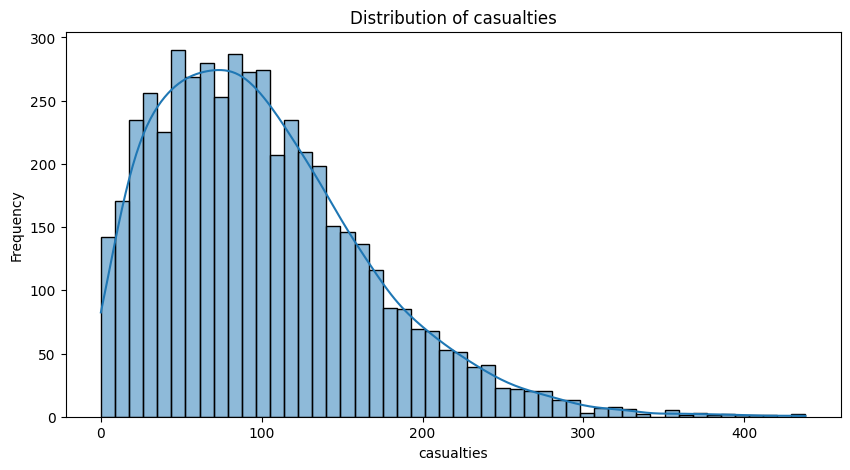

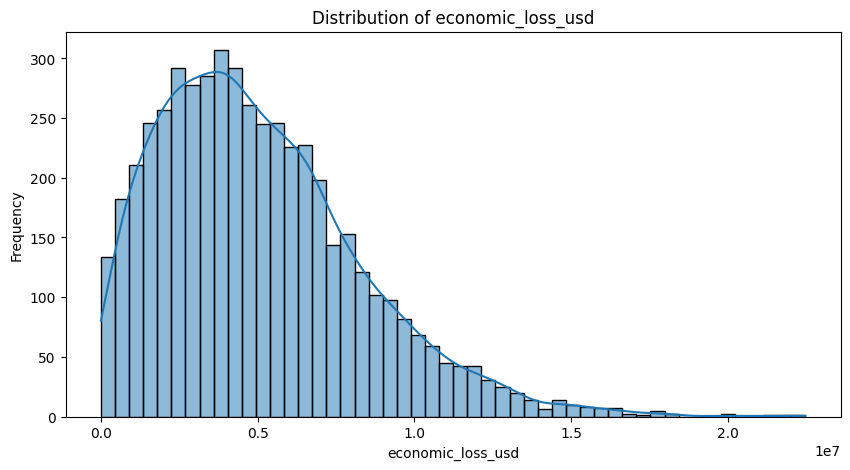

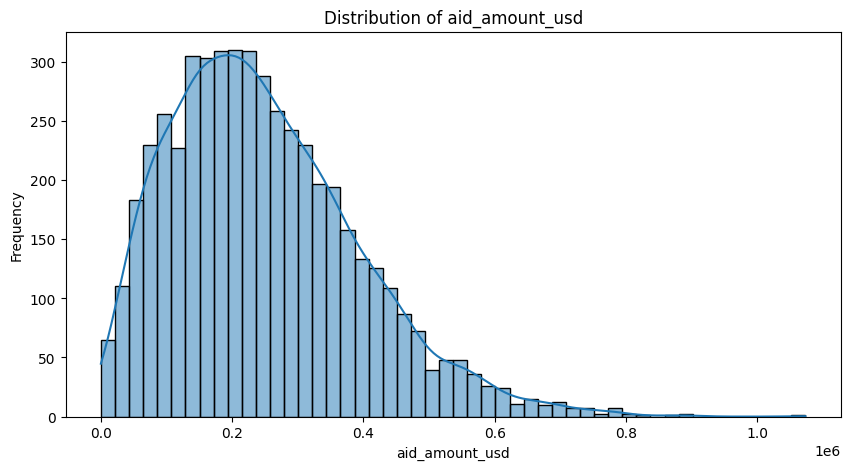

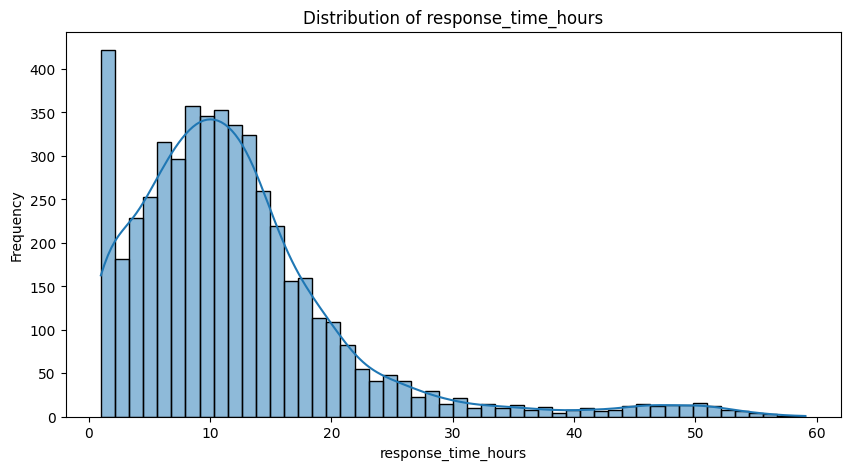

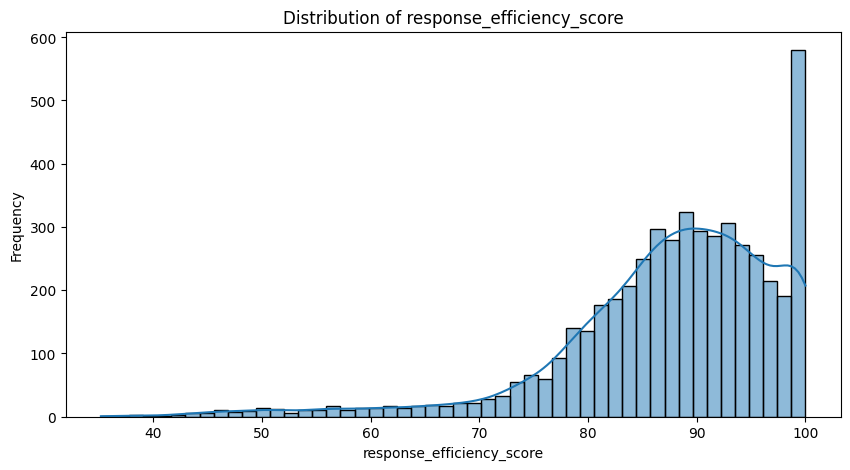

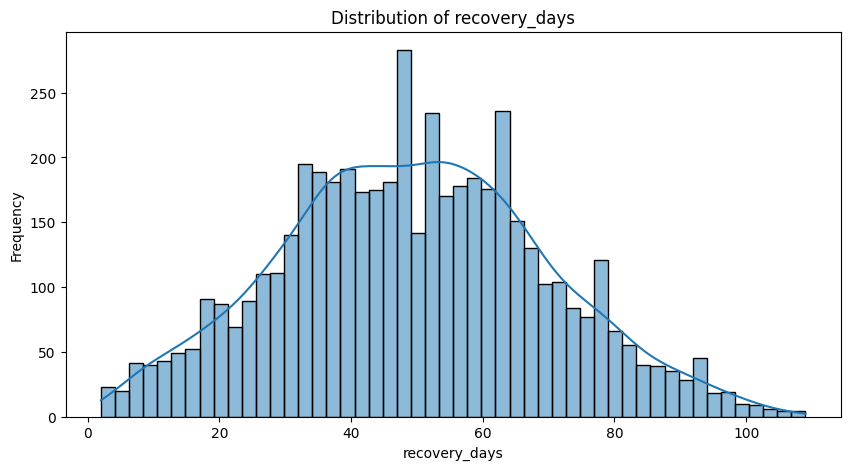

In [8]:
# Visualize numeric distributions
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = ['casualties', 'economic_loss_usd', 'aid_amount_usd', 'response_time_hours',
                'response_efficiency_score', 'recovery_days']

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df_sampled[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

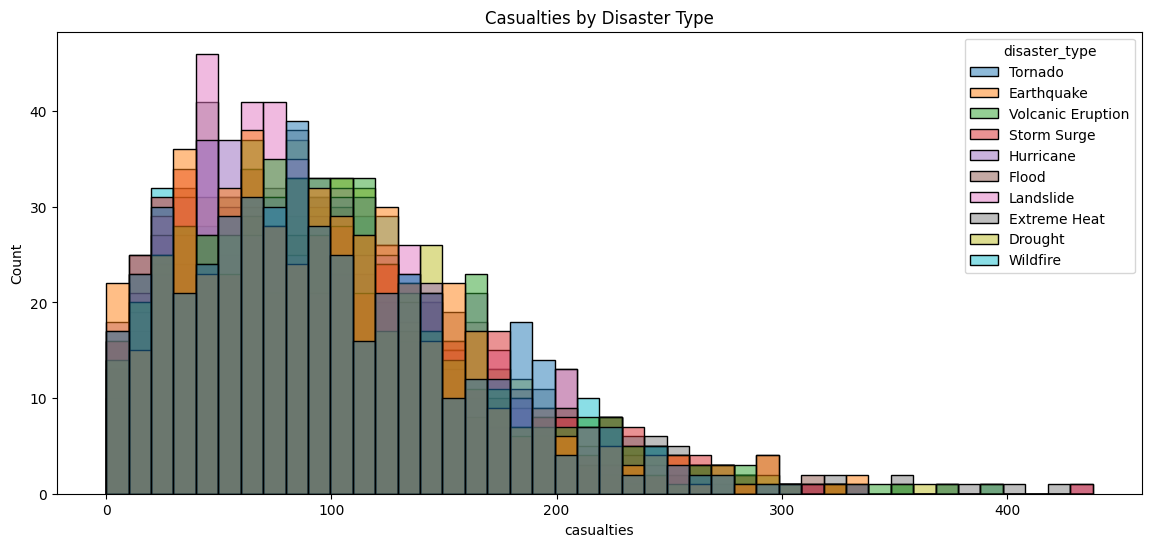

In [9]:
plt.figure(figsize=(14,6))
sns.histplot(data=df_sampled, x='casualties', hue='disaster_type')
plt.title('Casualties by Disaster Type')
plt.show()

<Axes: xlabel='casualties', ylabel='Density'>

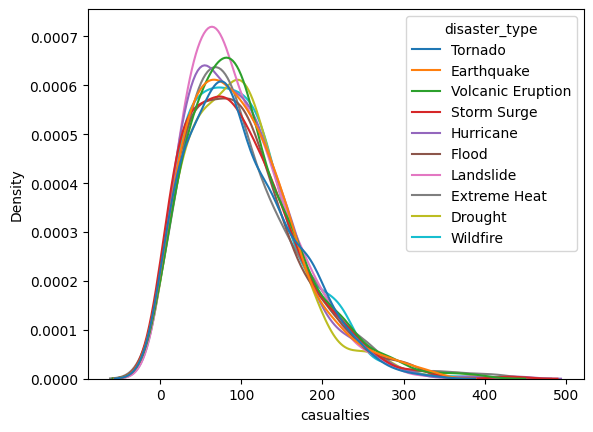

In [10]:
sns.kdeplot(data=df_sampled, x='casualties', hue='disaster_type')

<Axes: xlabel='severity_index', ylabel='Density'>

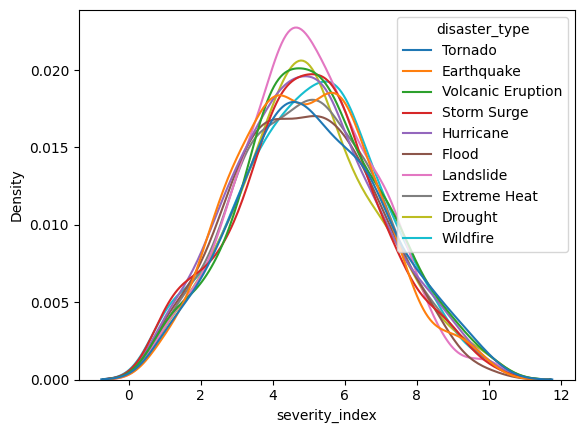

In [11]:
sns.kdeplot(data=df_sampled, x='severity_index', hue='disaster_type')

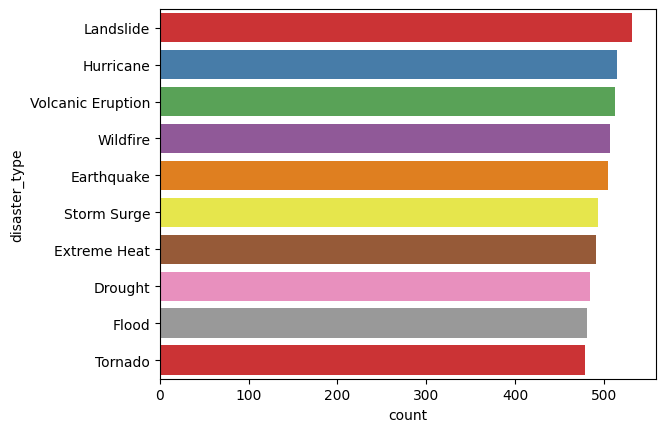

In [12]:
sns.countplot(y='disaster_type', data=df_sampled, order=df_sampled['disaster_type'].value_counts().index, palette='Set1')
plt.show()

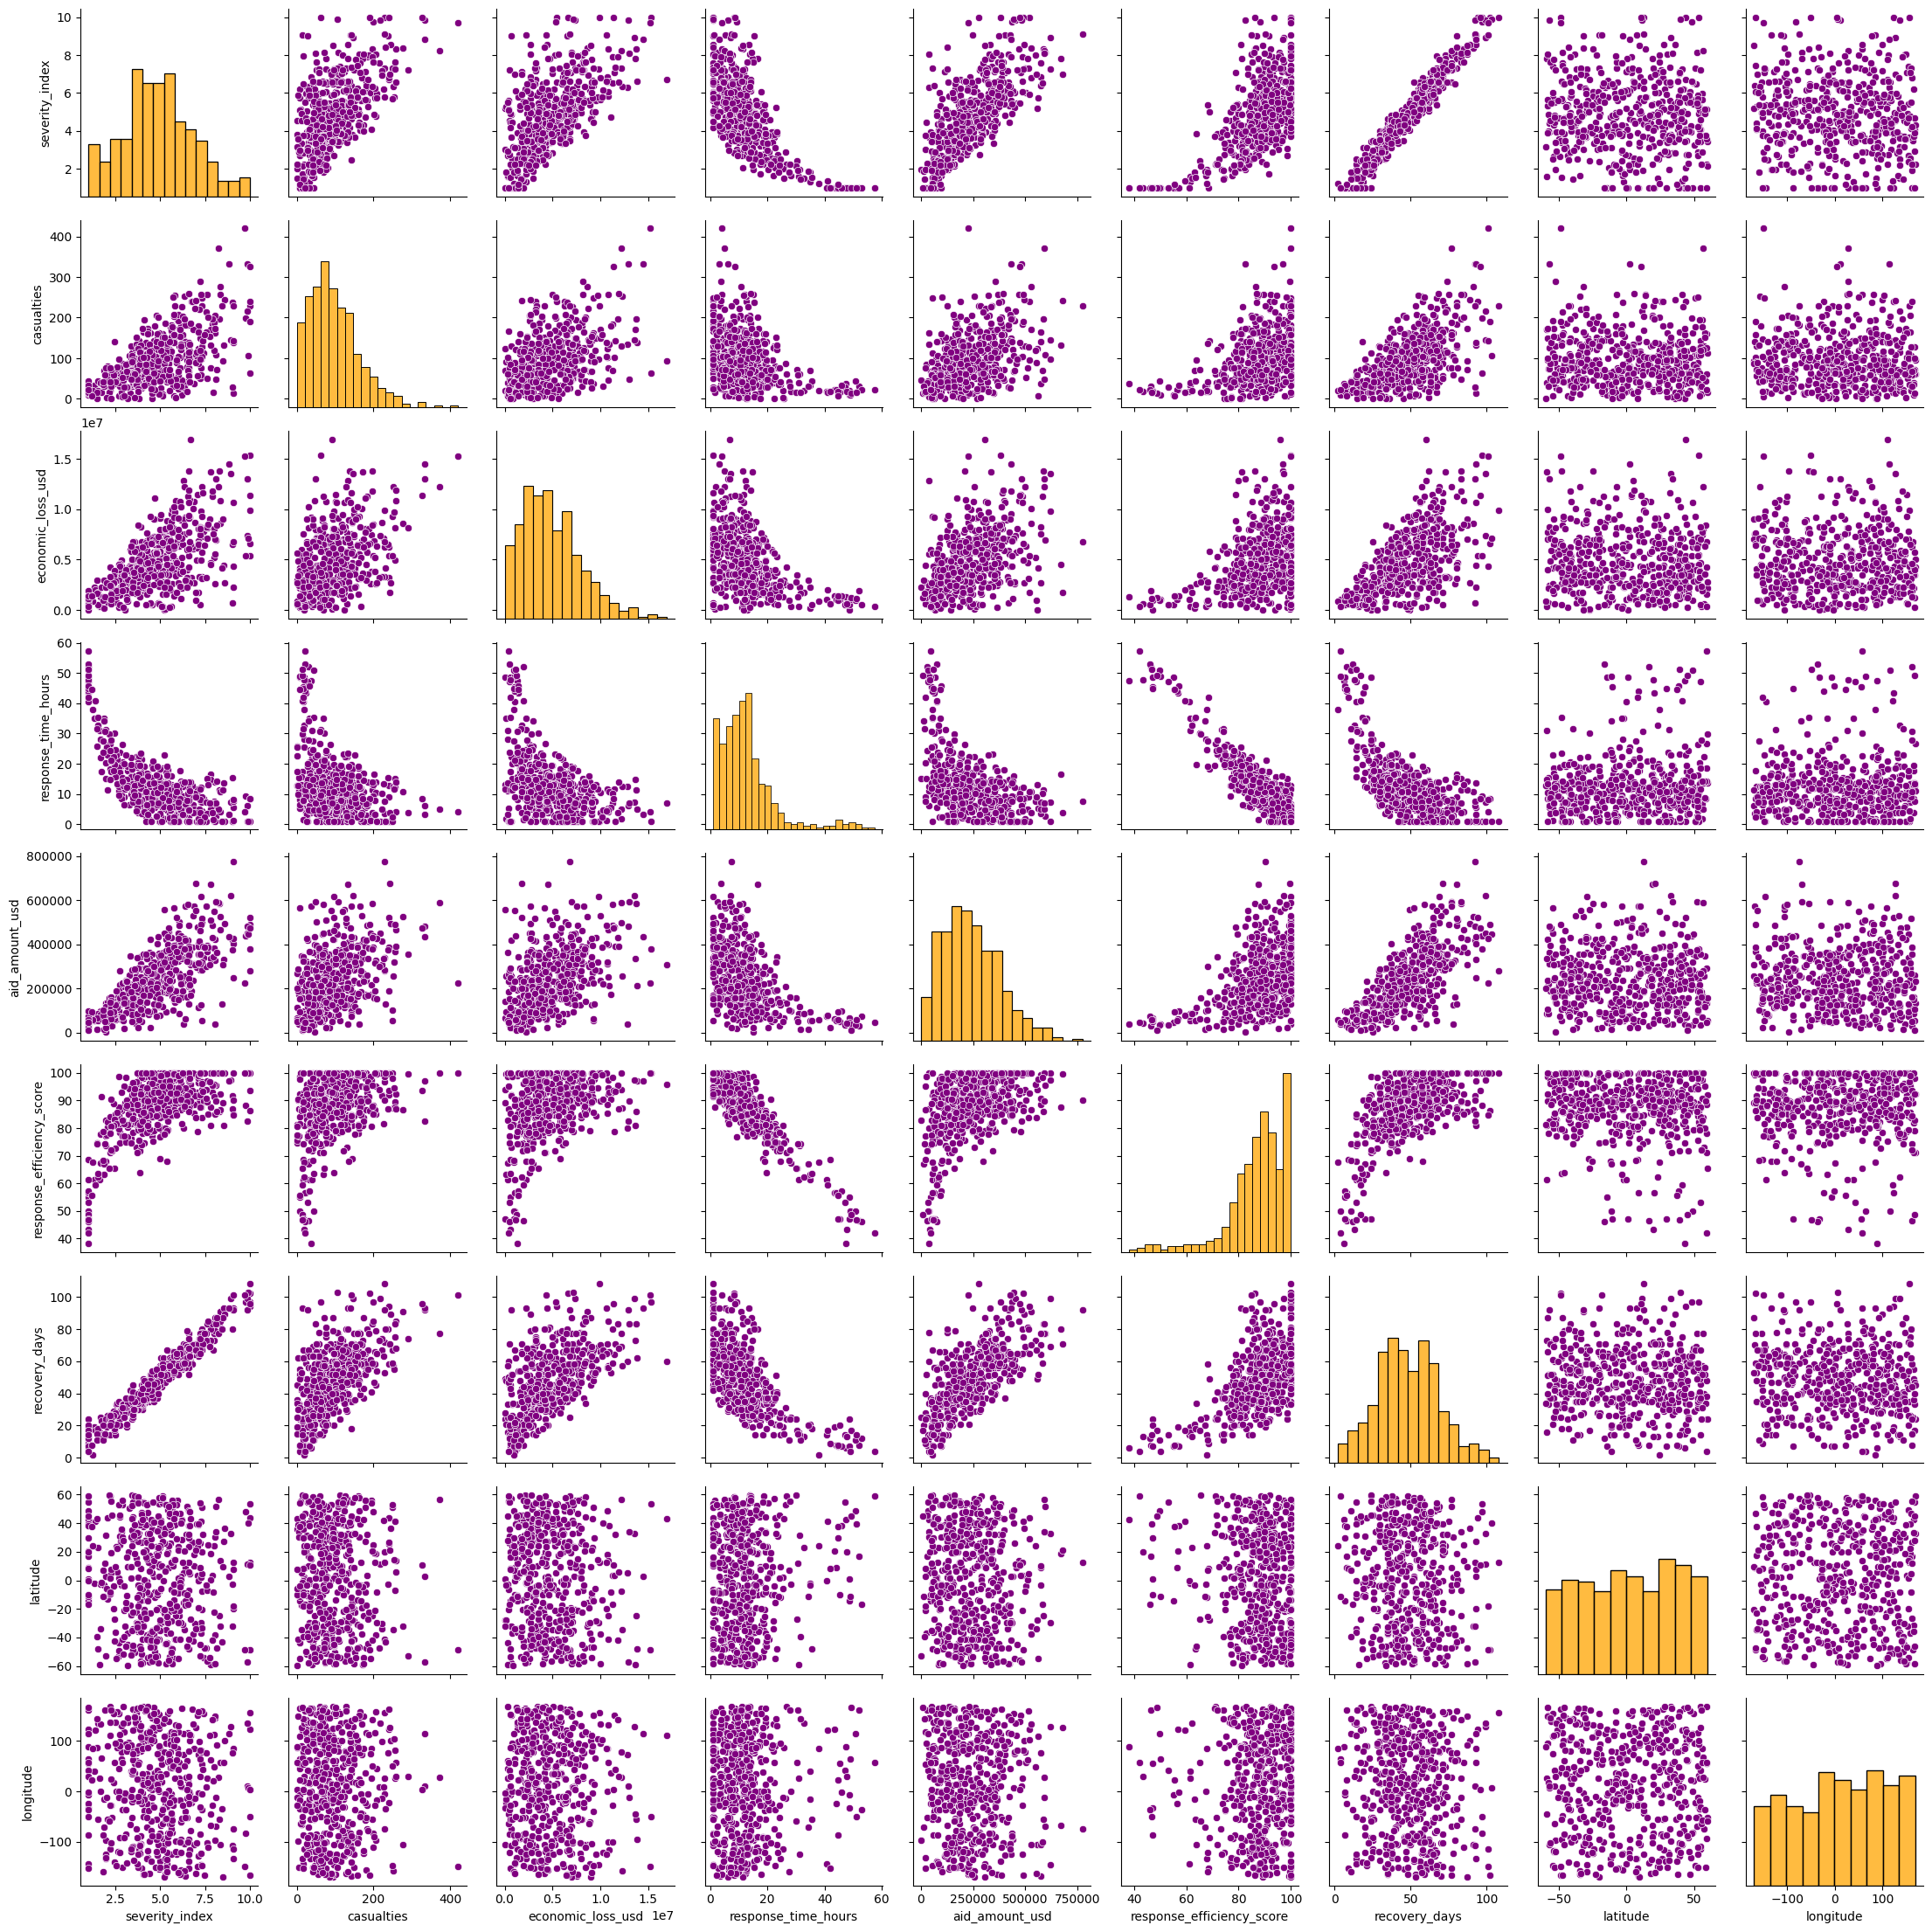

In [13]:
sns.pairplot(df_sampled.sample(frac=0.1), 
             plot_kws=dict(color='purple'),
             diag_kws=dict(color='orange'),
            )

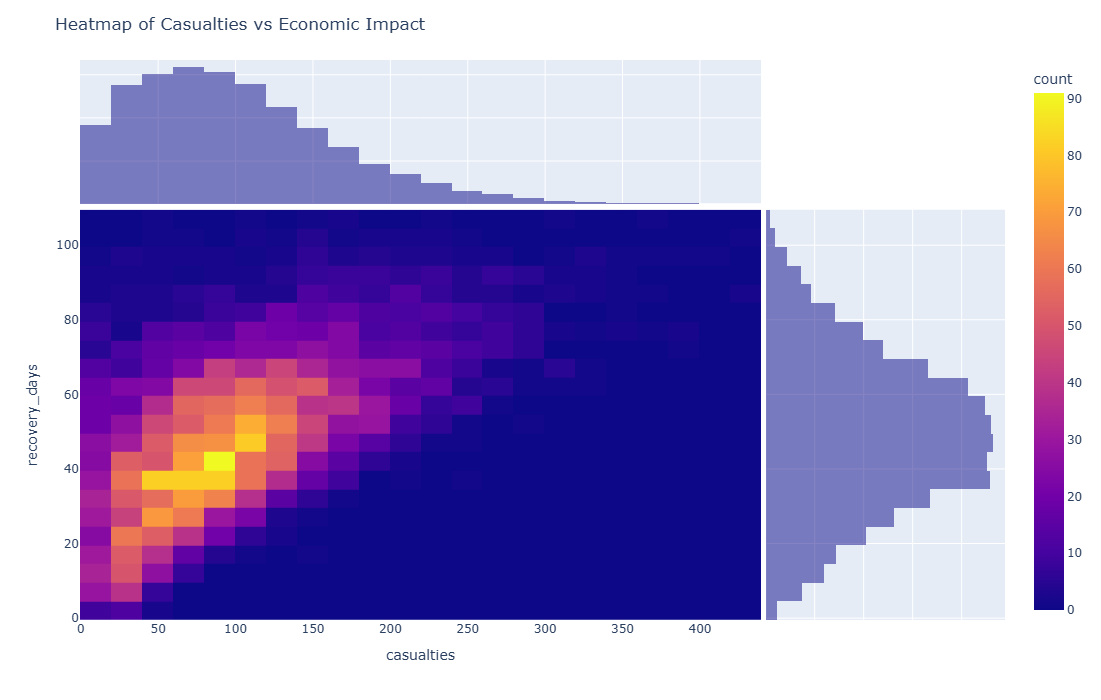

In [14]:
import plotly.express as px

fig = px.density_heatmap(
    data_frame=df_sampled,
    x='casualties', 
    y='recovery_days', 
    marginal_x="histogram",   # Adds histogram for x-axis
    marginal_y="histogram"    # Adds histogram for y-axis
)

fig.update_layout(
    height=700, 
    width=700,
    title="Heatmap of Casualties vs Economic Impact"
)

fig.show()

In [15]:
df_sampled.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
33553,2022-08-01,Italy,Tornado,8.60,180,10827147.80,9.89,229132.37,86.97,90,-1.115,-0.112
9427,2020-01-10,Indonesia,Tornado,7.46,138,2439828.15,1.00,536092.34,100.00,74,-9.849,-43.275
199,2023-02-26,Philippines,Tornado,5.27,86,5759986.81,2.37,161185.74,100.00,49,-29.361,-166.805
12447,2019-07-06,Japan,Earthquake,2.20,30,4428709.52,26.02,137224.66,79.64,15,-22.466,-102.910
39489,2018-02-04,South Africa,Volcanic Eruption,3.84,79,4644991.42,1.00,218975.96,100.00,40,-0.822,127.522


In [16]:
# Convert the date column to datetime format
df_sampled['date'] = pd.to_datetime(df_sampled['date'])

# Extract year, month, from the date
df_sampled['year'] = df_sampled['date'].dt.year
df_sampled['month'] = df_sampled['date'].dt.month

# Check the first few rows to see the new features
df_sampled.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude,year,month
33553,2022-08-01,Italy,Tornado,8.60,180,10827147.80,9.89,229132.37,86.97,90,-1.115,-0.112,2022,8
9427,2020-01-10,Indonesia,Tornado,7.46,138,2439828.15,1.00,536092.34,100.00,74,-9.849,-43.275,2020,1
199,2023-02-26,Philippines,Tornado,5.27,86,5759986.81,2.37,161185.74,100.00,49,-29.361,-166.805,2023,2
12447,2019-07-06,Japan,Earthquake,2.20,30,4428709.52,26.02,137224.66,79.64,15,-22.466,-102.910,2019,7
39489,2018-02-04,South Africa,Volcanic Eruption,3.84,79,4644991.42,1.00,218975.96,100.00,40,-0.822,127.522,2018,2


In [17]:
## EDA — time series & counts
# Events per year
events_per_year = df_sampled.groupby('year').size().reset_index(name='count')
fig = px.bar(events_per_year, x='year', y='count', title='Disaster Events per Year (2018-2024)')
fig.show()

# Average severity by year
avg_sev = df_sampled.groupby('year')['severity_index'].mean().reset_index()
fig = px.line(avg_sev, x='year', y='severity_index', title='Average Severity Index per Year', markers=True)
fig.show()

In [18]:
## EDA — top countries & disaster types
# Top countries by event count
top_countries = df_sampled['country'].value_counts().nlargest(15).reset_index()
top_countries.columns = ['country','count']
fig = px.bar(top_countries, x='count', y='country', orientation='h', title='Top 15 Countries by # of Events')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# Disaster type breakdown
type_counts = df_sampled['disaster_type'].value_counts().reset_index()
type_counts.columns = ['disaster_type','count']
fig = px.pie(type_counts, values='count', names='disaster_type', title='Disaster Type Distribution')
fig.show()

In [19]:
# Target variable
y = df_sampled['casualties']  # 0 = Low, 1 = High

In [20]:
# Example feature selection
binary_cols = [col for col in df_sampled.columns if col.endswith('_num')]
all_numeric = list(numeric_cols) + binary_cols
corr_matrix = df_sampled[all_numeric].corr()

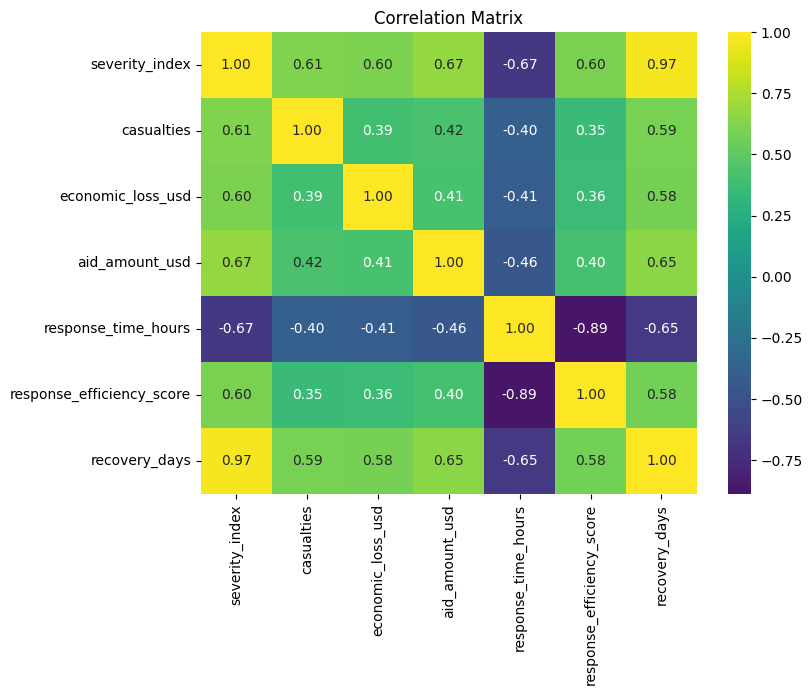

In [21]:
# Select numeric features for correlation
corr_cols = ['severity_index','casualties','economic_loss_usd','aid_amount_usd','response_time_hours','response_efficiency_score','recovery_days']
corr = df_sampled[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', center=0)
plt.title('Correlation Matrix')
plt.show()

In [22]:
## Hypothesis test & regression check
# H1: Faster response (lower response_time_hours) -> lower recovery_days
sub = df_sampled.dropna(subset=['response_time_hours','recovery_days'])
from scipy.stats import pearsonr
r, p = pearsonr(sub['response_time_hours'], sub['recovery_days'])
print(f'pearson r = {r:.3f}, p-value = {p:.3e}')

# Quick linear regression fit for visualization
import statsmodels.api as sm
X = sm.add_constant(sub['response_time_hours'])
model = sm.OLS(sub['recovery_days'], X, missing='drop').fit()
print(model.summary().tables[1])

pearson r = -0.655, p-value = 0.000e+00
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  66.9513      0.358    187.065      0.000      66.250      67.653
response_time_hours    -1.4344      0.023    -61.217      0.000      -1.480      -1.388


In [23]:
# Binary variable for Casualties
median_casualties = df_sampled['casualties'].median()
df_sampled['casualties_cat'] = df_sampled['casualties'].apply(lambda x: 'Low' if x < median_casualties else 'High')

# 2. Binary variable for Severity Index
median_severity = df_sampled['severity_index'].median()
df_sampled['severity_cat'] = df_sampled['severity_index'].apply(lambda x: 'Low' if x < median_severity else 'High')

# 3. Binary variable for Response Time (hours)
median_response = df_sampled['response_time_hours'].median()
df_sampled['response_time_cat'] = df_sampled['response_time_hours'].apply(lambda x: 'Fast' if x < median_response else 'Slow')

# 4. Binary variable for Recovery Days
median_recovery = df_sampled['recovery_days'].median()
df_sampled['recovery_days_cat'] = df_sampled['recovery_days'].apply(lambda x: 'Short' if x < median_recovery else 'Long')

In [24]:
df_sampled.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude,year,month,casualties_cat,severity_cat,response_time_cat,recovery_days_cat
33553,2022-08-01,Italy,Tornado,8.60,180,10827147.80,9.89,229132.37,86.97,90,-1.115,-0.112,2022,8,High,High,Fast,Long
9427,2020-01-10,Indonesia,Tornado,7.46,138,2439828.15,1.00,536092.34,100.00,74,-9.849,-43.275,2020,1,High,High,Fast,Long
199,2023-02-26,Philippines,Tornado,5.27,86,5759986.81,2.37,161185.74,100.00,49,-29.361,-166.805,2023,2,Low,High,Fast,Long
12447,2019-07-06,Japan,Earthquake,2.20,30,4428709.52,26.02,137224.66,79.64,15,-22.466,-102.910,2019,7,Low,Low,Slow,Short
39489,2018-02-04,South Africa,Volcanic Eruption,3.84,79,4644991.42,1.00,218975.96,100.00,40,-0.822,127.522,2018,2,Low,Low,Fast,Short


## 2. Scikit-learn
### Split in "train" and "test"

Split the dataset randomly in 80% for train (variable `df_train`) and 20% for test (variable `df_test`).

Use the function `train_test_split` after importing it:

```
from sklearn.model_selection import train_test_split
```

In [25]:
# Use train_test_split to create training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the dataset
df_sampled_train, df_sampled_test = train_test_split(df_sampled, test_size=0.2)
df_sampled_train

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude,year,month,casualties_cat,severity_cat,response_time_cat,recovery_days_cat
45780,2018-08-12,Nigeria,Drought,4.96,104,8411616.53,16.81,458553.24,82.32,56,49.109,91.173,2018,8,High,High,Slow,Long
32393,2024-03-08,Canada,Flood,7.03,179,10800197.67,4.26,299382.44,88.97,70,9.536,-141.948,2024,3,High,High,Fast,Long
45452,2023-11-03,Bangladesh,Volcanic Eruption,3.76,51,5246955.55,19.99,267380.75,88.18,37,-25.937,84.030,2023,11,Low,Low,Slow,Short
36719,2021-05-02,Chile,Landslide,7.27,8,4986635.71,14.26,379643.20,88.33,76,46.281,112.283,2021,5,Low,High,Slow,Long
3290,2021-03-04,Brazil,Hurricane,9.09,150,4718100.63,7.19,231546.31,100.00,97,-29.748,-86.940,2021,3,High,High,Fast,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48790,2022-09-04,Spain,Tornado,3.26,35,2587267.08,18.25,197518.42,77.41,25,35.287,-99.186,2022,9,Low,Low,Slow,Short
48172,2019-04-16,Australia,Drought,3.91,68,3558653.91,12.19,101653.95,83.68,29,3.537,-113.760,2019,4,Low,Low,Slow,Short
46674,2022-01-24,China,Landslide,3.27,85,2913250.38,15.86,200347.06,80.10,26,39.043,76.570,2022,1,Low,Low,Slow,Short
15207,2019-03-26,Japan,Extreme Heat,6.03,106,5433522.99,8.16,311530.28,87.41,59,-3.869,-100.693,2019,3,High,High,Fast,Long


In [26]:
# Running a linear model on the "train" dataset.
# Define X (features) and y (target) using the training split
feature_cols = ['severity_index', 'economic_loss_usd', 'aid_amount_usd',
                'response_time_hours', 'response_efficiency_score', 'casualties',
               'latitude', 'longitude', 'year']

X = df_sampled[feature_cols]
y = df_sampled['recovery_days'] # Target variable

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
# Fit Linear Regression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [28]:
# Intercept and coefficients
print(f"Intercept (constant) = {model_1.intercept_}")
print(f"Coefficients = {dict(zip(feature_cols, model_1.coef_))}")

Intercept (constant) = -78.25386655096949
Coefficients = {'severity_index': 9.98272430805089, 'economic_loss_usd': -2.8374656125588633e-08, 'aid_amount_usd': -4.992435276750393e-07, 'response_time_hours': -0.056241536033860486, 'response_efficiency_score': -0.03834077458680395, 'casualties': -0.0005161533660036154, 'latitude': 0.0008994021741974997, 'longitude': -0.0006166087145214897, 'year': 0.04064276978238775}


In [29]:
# Evaluate
# Predict on training set
y_train_pred = model_1.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("----- TRAIN SET METRICS -----")
print(f"R² = {r2_train}")
print(f"MSE = {mse_train}")
print(f"MAE = {mae_train}")

----- TRAIN SET METRICS -----
R² = 0.9369665121455653
MSE = 25.630802799856138
MAE = 4.040100829327857


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predictions on test set
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("----- TEST SET METRICS -----")
print(f"R² = {r2_test}")
print(f"MSE = {mse_test}")
print(f"MAE = {mae_test}")

----- TEST SET METRICS -----
R² = 0.939323172250581
MSE = 25.25897938679178
MAE = 3.9778358001107783


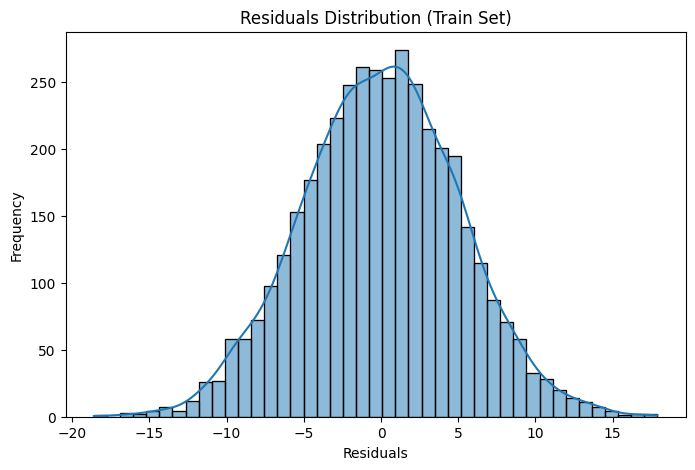

In [32]:
# ----- RESIDUAL PLOT (TRAIN) -----
residuals_train = y_train - y_train_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals_train, kde=True)
plt.title("Residuals Distribution (Train Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

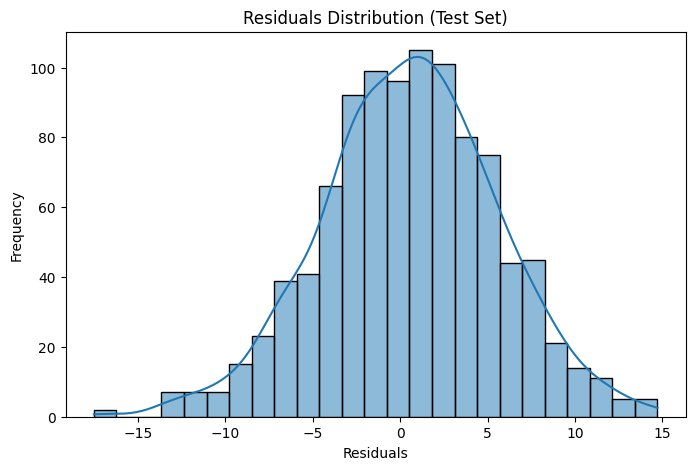

In [33]:
# ----- RESIDUAL PLOT (TEST) -----
residuals_test = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals_test, kde=True)
plt.title("Residuals Distribution (Test Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Using statsmodels, visualise the results of the model in a table.

In [34]:
import statsmodels.api as sm

In [35]:
# Target
y = df_sampled['recovery_days']

# Predictors (features)
feature_cols = ['severity_index', 'economic_loss_usd', 'aid_amount_usd',
                'response_time_hours', 'response_efficiency_score', 'casualties']
X = df_sampled[feature_cols]

# Add a constant term for the intercept
X = sm.add_constant(X)

In [36]:
# Fit model
ols_model = sm.OLS(y, X)
result = ols_model.fit()

# Show results in a formatted table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          recovery_days   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.248e+04
Date:                Wed, 10 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:00:11   Log-Likelihood:                -15196.
No. Observations:                5000   AIC:                         3.041e+04
Df Residuals:                    4993   BIC:                         3.045e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [37]:
# Predictions on train set
y_train_pred = result.predict(X)

# Residuals
residuals = y - y_train_pred

# Inspect first 5 rows
residuals.head()

33553    4.363401
9427    -0.156062
199     -3.223267
12447   -6.211813
39489    2.013803
dtype: float64

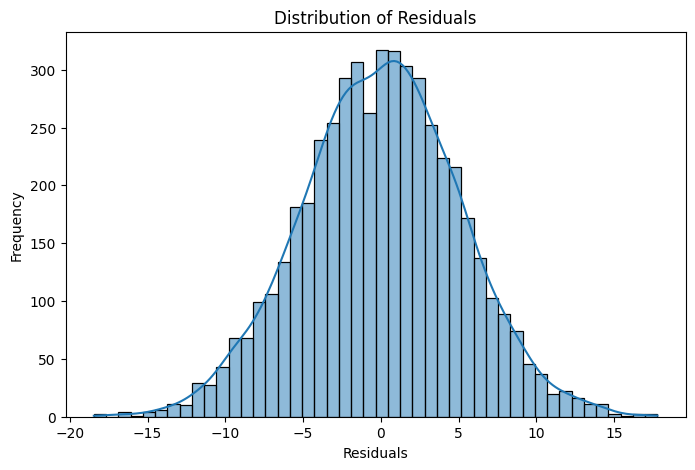

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## LOGIT Model

In [39]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd

In [40]:
# Create a new dependent variable, which is equal to 1 if the number of likes are above 100, and 0 if below 100.

# Binary target (make sure this column exists)
y = df_sampled['casualties_cat']  # 0 = Low, 1 = High

# Features (numeric predictors)
feature_cols = ['severity_index', 'economic_loss_usd', 'aid_amount_usd',
                'response_time_hours', 'response_efficiency_score', 'recovery_days']
X = df_sampled[feature_cols]

# Add constant for intercept
X = sm.add_constant(X)

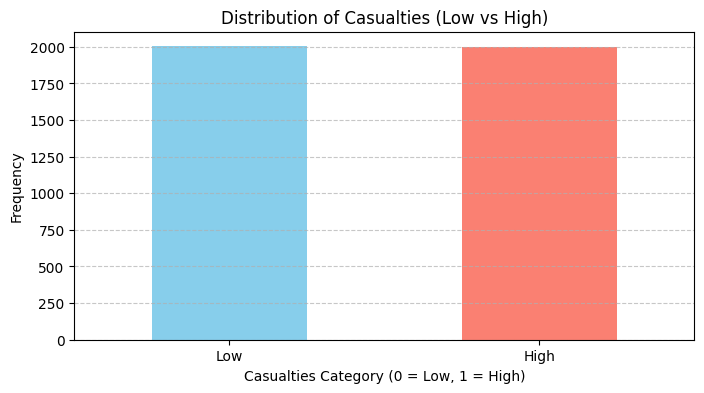

In [41]:
import matplotlib.pyplot as plt

# Count frequency of each class in the binary target
distribution = df_sampled_train['casualties_cat'].value_counts()

# Plot
plt.figure(figsize=(8, 4))
distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Casualties (Low vs High)')
plt.xlabel('Casualties Category (0 = Low, 1 = High)')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Low', 'High'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
# Assuming the binary target is currently 'Low'/'High'
# Let's convert to bumeric
df_sampled_train['casualties_cat'] = df_sampled_train['casualties_cat'].map({'Low':0, 'High':1})
df_sampled_test['casualties_cat'] = df_sampled_test['casualties_cat'].map({'Low':0, 'High':1})

In [43]:
# Define the dependent variable and the independent variable
# Target (binary casualties)
y = df_sampled_train['casualties_cat'].astype(int)  # 0 = Low, 1 = High

# Feature(s)
X = df_sampled_train[feature_cols].astype(float)  # adding the columns
# Add a constant to the independent variables matrix (for the intercept)
X = sm.add_constant(X)

# Create and fit the LOGIT model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the results, including p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.549484
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         casualties_cat   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3993
Method:                           MLE   Df Model:                            6
Date:                Wed, 10 Dec 2025   Pseudo R-squ.:                  0.2073
Time:                        16:00:13   Log-Likelihood:                -2197.9
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                4.488e-245
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.9566      0.822     -3.596      0.000      -4.

In [44]:
# Get the coefficients and exponentiate them to get the odds ratios
import numpy as np
odds_ratios = pd.DataFrame({
    'Coef': result.params,
    'Odds Ratio': result.params.apply(lambda x: round(np.exp(x), 4)),
    'P-Value': result.pvalues
})

# Print the odds ratios table
print(odds_ratios)

                                   Coef  Odds Ratio       P-Value
const                     -2.956599e+00      0.0520  3.226254e-04
severity_index             6.574908e-01      1.9299  6.745690e-16
economic_loss_usd          2.826612e-08      1.0000  5.582632e-02
aid_amount_usd            -2.539723e-08      1.0000  9.430940e-01
response_time_hours       -1.856698e-02      0.9816  6.935839e-02
response_efficiency_score  9.645582e-04      1.0010  9.037014e-01
recovery_days             -6.445711e-03      0.9936  3.717049e-01


Run a LOGIT model with more dependent variables. 

In [45]:

# Define the dependent variable and the independent variable
y = df_sampled_train['casualties_cat']
X = df_sampled_train[['severity_index', 'economic_loss_usd', 'aid_amount_usd',
                'response_time_hours', 'response_efficiency_score', 'recovery_days']]

# Add a constant to the independent variables matrix (for the intercept)
X = sm.add_constant(X)

# Create and fit the LOGIT model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the results, including p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.549484
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         casualties_cat   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3993
Method:                           MLE   Df Model:                            6
Date:                Wed, 10 Dec 2025   Pseudo R-squ.:                  0.2073
Time:                        16:00:13   Log-Likelihood:                -2197.9
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                4.488e-245
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.9566      0.822     -3.596      0.000      -4.

In [46]:
# Get the coefficients and exponentiate them to get the odds ratios
odds_ratios = pd.DataFrame({
    'Coef': result.params,
    'Odds Ratio': result.params.apply(lambda x: round(np.exp(x), 4)),
    'P-Value': result.pvalues
})

# Print the odds ratios table
print(odds_ratios)

                                   Coef  Odds Ratio       P-Value
const                     -2.956599e+00      0.0520  3.226254e-04
severity_index             6.574908e-01      1.9299  6.745690e-16
economic_loss_usd          2.826612e-08      1.0000  5.582632e-02
aid_amount_usd            -2.539723e-08      1.0000  9.430940e-01
response_time_hours       -1.856698e-02      0.9816  6.935839e-02
response_efficiency_score  9.645582e-04      1.0010  9.037014e-01
recovery_days             -6.445711e-03      0.9936  3.717049e-01


## 3. Classification

In [47]:
# !pip install pycaret

In [48]:
from pycaret.classification import *
import pandas as pd

In [49]:
df_sampled.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude,year,month,casualties_cat,severity_cat,response_time_cat,recovery_days_cat
33553,2022-08-01,Italy,Tornado,8.60,180,10827147.80,9.89,229132.37,86.97,90,-1.115,-0.112,2022,8,High,High,Fast,Long
9427,2020-01-10,Indonesia,Tornado,7.46,138,2439828.15,1.00,536092.34,100.00,74,-9.849,-43.275,2020,1,High,High,Fast,Long
199,2023-02-26,Philippines,Tornado,5.27,86,5759986.81,2.37,161185.74,100.00,49,-29.361,-166.805,2023,2,Low,High,Fast,Long
12447,2019-07-06,Japan,Earthquake,2.20,30,4428709.52,26.02,137224.66,79.64,15,-22.466,-102.910,2019,7,Low,Low,Slow,Short
39489,2018-02-04,South Africa,Volcanic Eruption,3.84,79,4644991.42,1.00,218975.96,100.00,40,-0.822,127.522,2018,2,Low,Low,Fast,Short


In [50]:
# Ensuring binary target is numeric
df_sampled['severity_cat'] = df_sampled['severity_cat'].map({'Low':0, 'High':1})

# Select features for classification
feature_cols = ['casualties', 'economic_loss_usd', 'aid_amount_usd',
                'response_time_hours', 'response_efficiency_score', 'recovery_days',
                'disaster_type']  # include categorical columns
df_model = df_sampled[feature_cols + ['severity_cat']]

In [51]:
clf_setup = setup(
    data=df_model,
    target='severity_cat',
    session_id=123,
    normalize=True,
    remove_outliers=True)

,Description,Value
0,Session id,123
1,Target,severity_cat
2,Target type,Binary
3,Original data shape,"(5000, 8)"
4,Transformed data shape,"(4825, 17)"
5,Transformed train set shape,"(3325, 17)"
6,Transformed test set shape,"(1500, 17)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


In [52]:
# Compare models
from pycaret.classification import compare_models
# Compare different classifiers and return the best one based on default metric (Accuracy)
# Excluding xgboost and catboost for faster runtime or compatibility
best_model = compare_models(exclude=["xgboost","catboost"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9351,0.9844,0.9357,0.9353,0.9352,0.8703,0.8709,0.8710
rf,Random Forest Classifier,0.9343,0.9840,0.9346,0.9346,0.9344,0.8686,0.8690,0.7250
lr,Logistic Regression,0.9334,0.9860,0.9363,0.9316,0.9338,0.8669,0.8672,1.6430
ada,Ada Boost Classifier,0.9317,0.9817,0.9300,0.9339,0.9317,0.8634,0.8639,0.4730
et,Extra Trees Classifier,0.9309,0.9839,0.9340,0.9289,0.9312,0.8617,0.8622,0.5810
lightgbm,Light Gradient Boosting Machine,0.9303,0.9826,0.9311,0.9301,0.9304,0.8606,0.8609,0.4830
ridge,Ridge Classifier,0.9300,0.9853,0.9237,0.9362,0.9297,0.8600,0.8604,0.2880
lda,Linear Discriminant Analysis,0.9300,0.9853,0.9237,0.9362,0.9297,0.8600,0.8604,0.2530
svm,SVM - Linear Kernel,0.9277,0.9834,0.9260,0.9298,0.9278,0.8554,0.8556,0.2830
nb,Naive Bayes,0.9103,0.9720,0.9294,0.8962,0.9123,0.8206,0.8215,0.2650


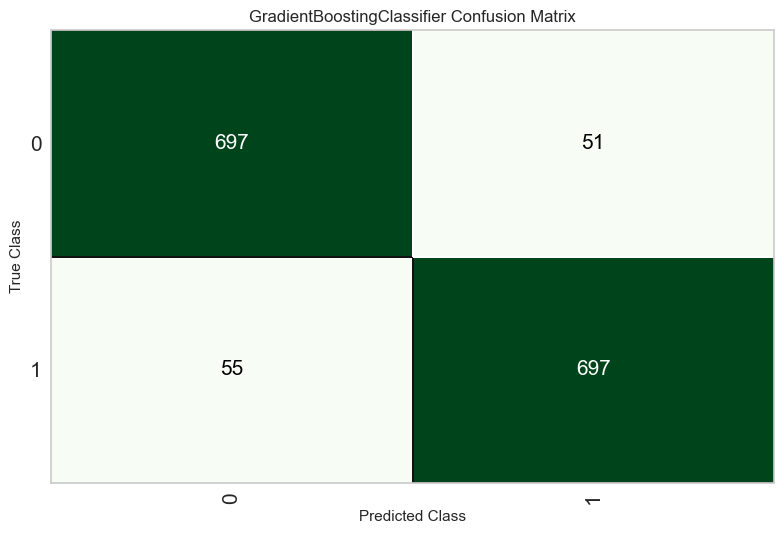

In [53]:
# Visualize confusion matrix for the best model
plot_model(best_model, plot='confusion_matrix')

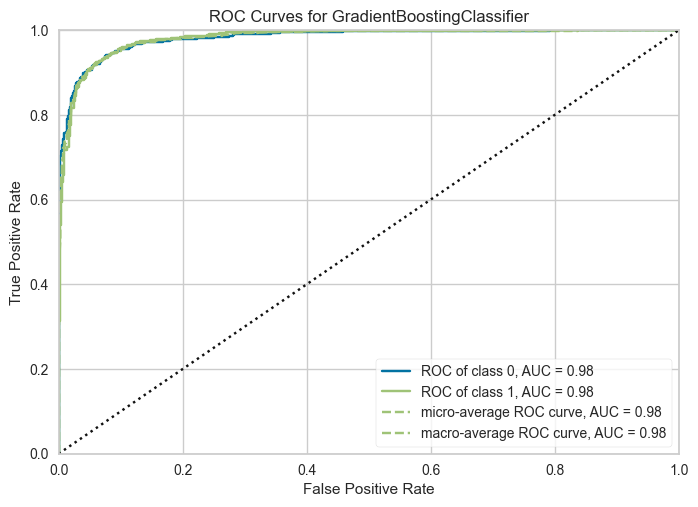

In [54]:
# Plot ROC AUC curve
# Visualize AUC (ROC curve) for best_model
plot_model(best_model, plot='auc')

In [55]:
# Hyperparameter tuning
from pycaret.classification import tune_model
# Automatically tune hyperparameters of best_model to improve performance
tuned_best_model = tune_model(best_model)
print(tuned_best_model) # Display tuned model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9514,0.9920,0.9600,0.9438,0.9518,0.9029,0.9030
1,0.9400,0.9891,0.9600,0.9231,0.9412,0.8800,0.8807
2,0.9514,0.9942,0.9543,0.9489,0.9516,0.9029,0.9029
3,0.9229,0.9771,0.9371,0.9111,0.9239,0.8457,0.8461
4,0.9400,0.9912,0.9545,0.9282,0.9412,0.8800,0.8803
5,0.9114,0.9709,0.8920,0.9290,0.9101,0.8229,0.8236
6,0.9286,0.9815,0.9148,0.9415,0.9280,0.8572,0.8575
7,0.9314,0.9899,0.9318,0.9318,0.9318,0.8629,0.8629
8,0.9429,0.9874,0.9489,0.9382,0.9435,0.8857,0.8858


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## 4. Clustering

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding categorical variables
df_sampled['severity_cat'] = df_sampled['severity_cat'].map({'Low':0, 'High':1})

# Selecting the relevant features
X = df_sampled[['casualties', 'economic_loss_usd', 'response_time_hours', 'recovery_days']]

In [57]:
X.head()

,casualties,economic_loss_usd,response_time_hours,recovery_days
33553,180,10827147.80,9.89,90
9427,138,2439828.15,1.00,74
199,86,5759986.81,2.37,49
12447,30,4428709.52,26.02,15
39489,79,4644991.42,1.00,40


In [58]:
# --- K-Means Clustering ---
# Standardizing the features (important for K-Means)
# Important for K-Means as it is sensitive to scale of features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.20620774,  1.7902648 , -0.24761081,  2.00401964],
       [ 0.56805564, -0.80435863, -1.21123556,  1.21252706],
       [-0.22203742,  0.22273486, -1.06273546, -0.0241801 ],
       ...,
       [-0.25242562, -0.4710555 ,  1.28399974, -0.96407754],
       [-1.31601244, -1.05458261,  3.69577148, -2.10184812],
       [-0.08529055, -0.44499661, -1.21123556, -0.0241801 ]])

In [59]:
# Applying K-Means
# n_clusters=5: specify number of clusters, can be adjusted
# random_state=42: ensures reproducibility
# fit_predict assigns each data point to a cluster
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change n_clusters based on your need
df_sampled['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

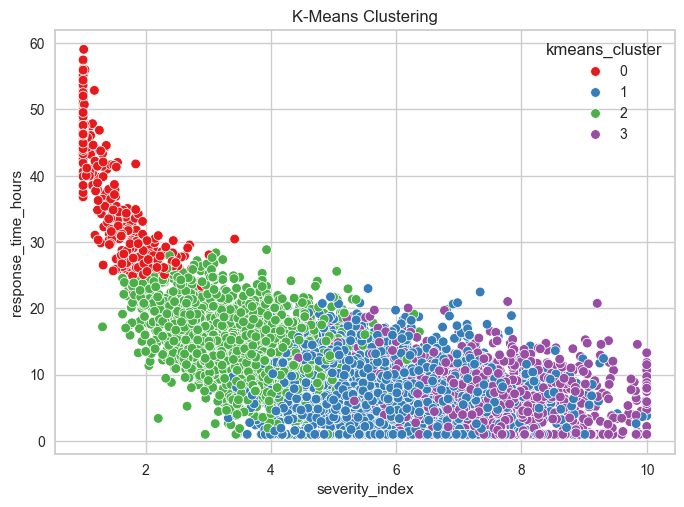

In [60]:
# Visualizing the clusters
sns.scatterplot(data=df_sampled, x='severity_index', y='response_time_hours', hue='kmeans_cluster', palette='Set1')
plt.title('K-Means Clustering')
plt.show()

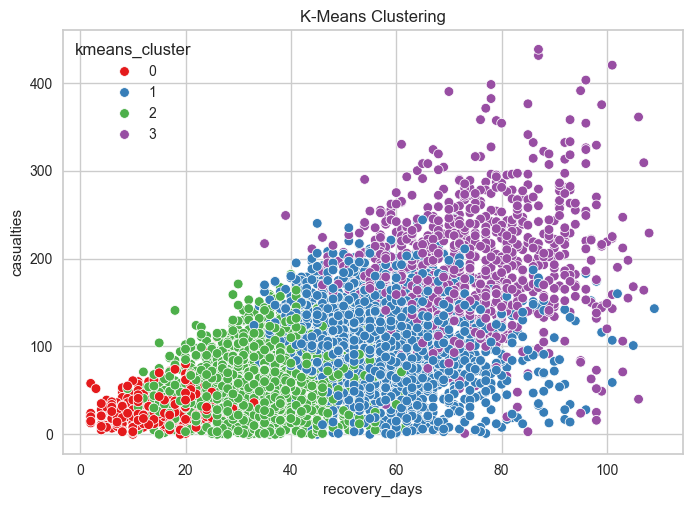

In [61]:
# Visualizing the clusters
sns.scatterplot(data=df_sampled, x='recovery_days', y='casualties', hue='kmeans_cluster', palette='Set1')
plt.title('K-Means Clustering')
plt.show()

In [62]:
df_stat = df_sampled.groupby("kmeans_cluster")[['economic_loss_usd','casualties','severity_index','response_time_hours']].agg(['mean','std'])
df_stat

economic_loss_usd                casualties             \
                            mean           std        mean        std   
kmeans_cluster                                                          
0                   1.348357e+06  7.934155e+05   29.322674  17.249091   
1                   5.382985e+06  2.365482e+06  103.563512  46.313157   
2                   3.149419e+06  1.608306e+06   63.000592  34.493120   
3                   9.089274e+06  3.294241e+06  188.879440  63.870242   

               severity_index           response_time_hours            
                         mean       std                mean       std  
kmeans_cluster                                                         
0                    1.478198  0.480443           37.486773  9.721031  
1                    5.681927  1.110310            8.076930  4.521868  
2                    3.575438  0.859302           14.771214  5.070320  
3                    7.368558  1.236773            7.076050  4.395876

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0428,242.2438,4.2596,0,0,0


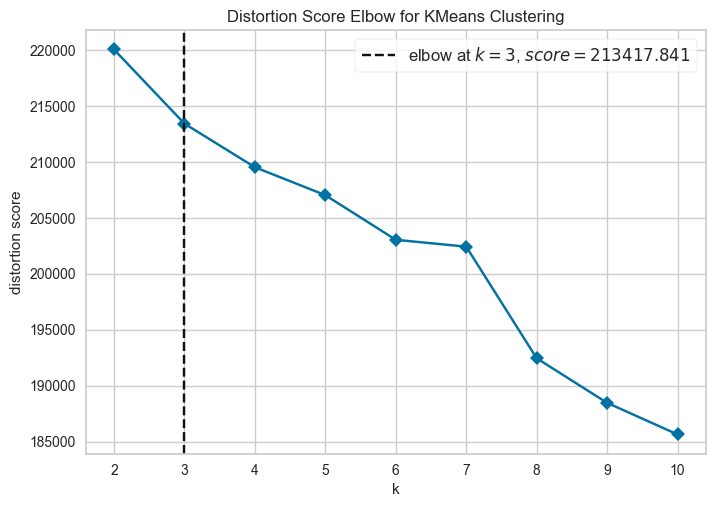

In [64]:
# Importing pycaret.clustering and other necessary libraries
from pycaret.clustering import *
import pandas as pd

# Setup environment for clustering
exp_clus = setup(data = df_sampled,
                 normalize = True,  # StandardScaler applied automatically
                 session_id = 123,
                 verbose = False)

# Create the K-Means model
kmeans = create_model('kmeans')

# Generate the Elbow Plot to find optimal clusters
plot_model(kmeans, plot = 'elbow')

#### --- DBSCAN Clustering ---

In [65]:
dbscan = DBSCAN(eps=70, min_samples=100)  # Adjust eps and min_samples based on your data
df_sampled['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

In [66]:
df_sampled.dbscan_cluster.unique()

array([0], dtype=int64)

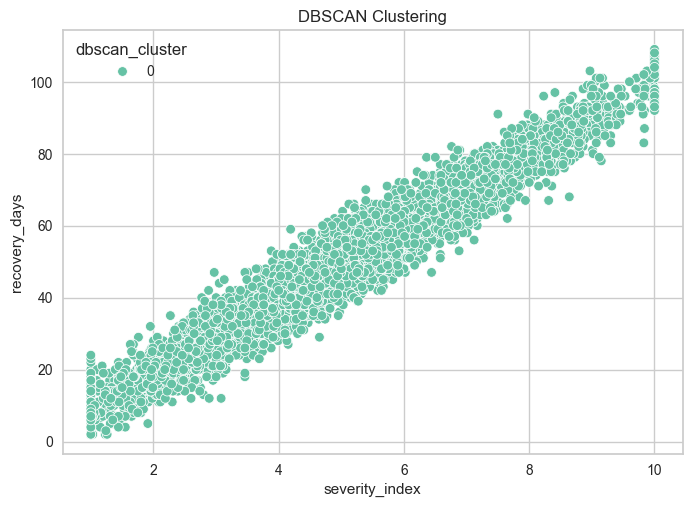

In [67]:
# Visualizing DBSCAN clusters

# Each point is plotted with 'severity_index' on the x-axis and 'response_time_hours' on the y-axis.
# The hue represents the cluster assigned by DBSCAN.
sns.scatterplot(data=df_sampled, x='severity_index', y='recovery_days', hue='dbscan_cluster', palette='Set2')
plt.title('DBSCAN Clustering')
plt.show()

In [68]:
# Displaying first few rows to see the clustering results
print(df_sampled[['disaster_type', 'severity_index', 'casualties', 'response_time_hours', 'kmeans_cluster', 'dbscan_cluster']].head())

           disaster_type  severity_index  casualties  response_time_hours  \
33553            Tornado            8.60         180                 9.89   
9427             Tornado            7.46         138                 1.00   
199              Tornado            5.27          86                 2.37   
12447         Earthquake            2.20          30                26.02   
39489  Volcanic Eruption            3.84          79                 1.00   

       kmeans_cluster  dbscan_cluster  
33553               3               0  
9427                1               0  
199                 1               0  
12447               0               0  
39489               1               0  


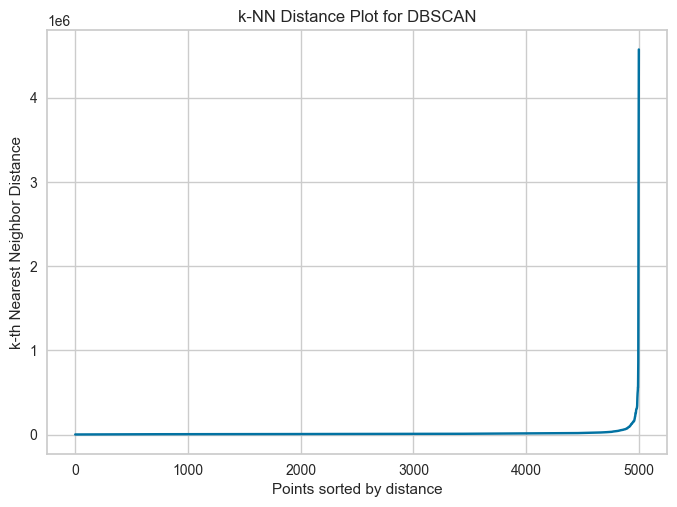

In [69]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your selected feature set for clustering
neighbors = NearestNeighbors(n_neighbors=8)  # 8 = min_samples
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort the distances (for the k-th neighbor)
distances = np.sort(distances[:, 7])  # Plot the distance to the 8th nearest neighbor
plt.plot(distances)
plt.title('k-NN Distance Plot for DBSCAN')  # Title of the plot
plt.xlabel('Points sorted by distance')     # X-axis: sorted points
plt.ylabel('k-th Nearest Neighbor Distance') # Y-axis: distance to 8th nearest neighbor
plt.show()

In [70]:
# We compute the distance from each disaster event to its 8th nearest neighbor 
# (because min_samples = 8 for DBSCAN in our project).
# Then we sort these distances and plot them.
# The resulting curve helps us find the “elbow”, which indicates the optimal eps value for DBSCAN:
# The flat region represents disaster points that belong to dense clusters.
# The sharp increase shows disaster events that behave like outliers or noise.
# The elbow point ≈ the eps value we should use for clustering disaster data.